<a href="https://colab.research.google.com/github/hoangcuongnguyen2001/Intro-to-Data-Science/blob/main/Assignment2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This code here is based on Mushroom Predictions with 6 Classification Models on Kaggle, Tuğçe Kızıltepe:
# https://www.kaggle.com/tugcekiziltepe/mushroom-predictions-with-6-classification-models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('https://raw.githubusercontent.com/hoangcuongnguyen2001/Intro-to-Data-Science/main/Assignment%202/mushrooms%20(1).csv')
print('The dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))
display(df.describe())
display(df.head())

new_df = df.select_dtypes(include=['object']).copy()
new_df.drop('veil-type', inplace=True, axis=1)
new_df.drop('stalk-root', inplace=True, axis=1)
new_df.head()
#new_df["stalk-root"].replace({"?": "n/a"}, inplace= True)
#new_df["stalk-root"].value_counts()



The dataset has 8124 rows and 23 columns


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,s,s,w,w,w,o,e,n,a,g


In [ ]:
df.select_dtypes(include=['object'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


In [ ]:
X = new_df.iloc[:, 1:].values
Y = new_df.iloc[:, 0].values
  
#Encoding the data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = df.iloc[:, 1:].apply(le.fit_transform).values
Y = np.array(le.fit_transform(Y))
Y.reshape(len(Y), 1)
print(X)
print(Y)

[[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]
[1 0 0 ... 0 1 0]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.666666, random_state = 1)
first_X = X_train.copy()
first_Y = Y_train.copy()
first_X_train, first_X_test, first_Y_train, first_Y_test = train_test_split(first_X, first_Y, test_size = 0.1,shuffle = True, random_state = 1)



In [ ]:
new_X = X_test.copy()
new_Y = Y_test.copy()
new_X_train, new_X_test, new_Y_train, new_Y_test = train_test_split(new_X, new_Y, test_size = 0.5,shuffle = True, random_state = 1)
second_X = new_X_train.copy()
second_Y = new_Y_train.copy()
second_X_train, second_X_test, second_Y_train, second_Y_test = train_test_split(second_X, second_Y, test_size = 0.1,shuffle = True, random_state = 1)
third_X = new_X_test.copy()
third_Y = new_Y_test.copy()
third_X_train, third_X_test, third_Y_train, third_Y_test = train_test_split(third_X, third_Y, test_size = 0.1,shuffle = True, random_state = 1)
print(first_X_train.shape[0])
print(first_X_test.shape[0])
print(second_X_train.shape[0])
print(second_X_test.shape[0])
print(third_X_train.shape[0])
print(third_X_test.shape[0])

2437
271
2437
271
2437
271


In [ ]:
#calculating for first test.
accuracies = dict()
precisions = dict()
from sklearn.tree import DecisionTreeClassifier

first_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
first_classifier.fit(first_X_train, first_Y_train)

first_Y_result = first_classifier.predict(first_X_test)

from sklearn.metrics import accuracy_score
accuracies['First Decision Tree'] = accuracy_score(first_Y_test, first_Y_result)
print('Accuracy for First Decision Tree is '  + str(accuracy_score(first_Y_test, first_Y_result)))

from sklearn.metrics import precision_score
precisions['First Decision Tree'] = accuracy_score(first_Y_test, first_Y_result)
print('Precision for First Decision Tree is ' + str(precision_score(first_Y_test, first_Y_result)))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(first_Y_test, first_Y_result)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

Accuracy for First Decision Tree is 1.0
Precision for First Decision Tree is 1.0
True positive =  141
False positive =  0
False negative =  0
True negative =  130


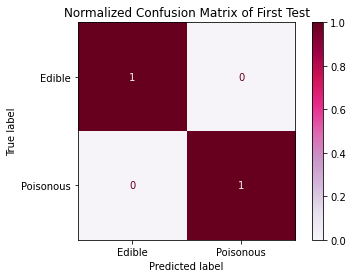

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(first_classifier,first_X_test, first_Y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of First Test")
plt.show()

In [ ]:
# Calculating for second test.
second_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
second_classifier.fit(second_X_train, second_Y_train)

second_Y_result = second_classifier.predict(second_X_test)

accuracies['Second Decision Tree'] = accuracy_score(second_Y_test, second_Y_result)
print('Accuracy for Second Decision Tree is '  + str(accuracy_score(second_Y_test, second_Y_result)))

precisions['Second Decision Tree'] = precision_score(second_Y_test, second_Y_result)
print('Precision for Second Decision Tree is ' + str(precision_score(second_Y_test, second_Y_result)))

cm = confusion_matrix(second_Y_test, second_Y_result)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

Accuracy for Second Decision Tree is 1.0
Precision for Second Decision Tree is 1.0
True positive =  127
False positive =  0
False negative =  0
True negative =  144


In [ ]:
# Calculating for second test.
third_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
third_classifier.fit(third_X_train, third_Y_train)

third_Y_result = third_classifier.predict(third_X_test)

accuracies['Third Decision Tree'] = accuracy_score(third_Y_test, third_Y_result)
print('Accuracy for Third Decision Tree is '  + str(accuracy_score(third_Y_test, third_Y_result)))

precisions['Third Decision Tree'] = precision_score(third_Y_test, third_Y_result)
print('Precision for Third Decision Tree is ' + str(precision_score(third_Y_test, third_Y_result)))

cm = confusion_matrix(third_Y_test, third_Y_result)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])

Accuracy for Third Decision Tree is 1.0
Precision for Third Decision Tree is 1.0
True positive =  135
False positive =  0
False negative =  0
True negative =  136


In [ ]:
from sklearn.metrics import classification_report
y_pred = first_classifier.predict(first_X_test)
print(classification_report(first_Y_test, y_pred))

import scipy.stats as stats
stats.describe(y_pred)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       130

    accuracy                           1.00       271
   macro avg       1.00      1.00      1.00       271
weighted avg       1.00      1.00      1.00       271



DescribeResult(nobs=271, minmax=(0, 1), mean=0.4797047970479705, variance=0.25051250512505124, skewness=0.08124777054308345, kurtosis=-1.9933987997817784)

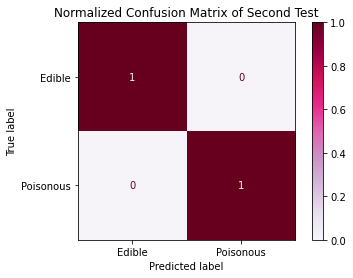

In [ ]:


plot_confusion_matrix(second_classifier,second_X_test, second_Y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Second Test")
plt.show()

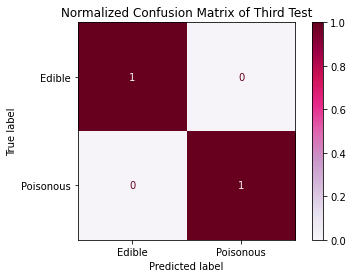

In [ ]:
plot_confusion_matrix(third_classifier,third_X_test, third_Y_test, display_labels= ['Edible', 'Poisonous'], cmap = plt.cm.PuRd, normalize= 'true')
plt.title("Normalized Confusion Matrix of Third Test")
plt.show()

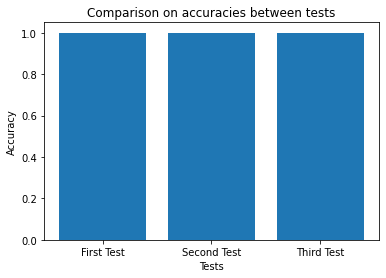

In [ ]:
Tests = ['First Test', 'Second Test', 'Third Test']
Accuracies = [accuracies['First Decision Tree'],accuracies['Second Decision Tree'],accuracies['Third Decision Tree']]

plt.bar(Tests, Accuracies)
plt.title('Comparison on accuracies between tests')
plt.xlabel('Tests')
plt.ylabel('Accuracy')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


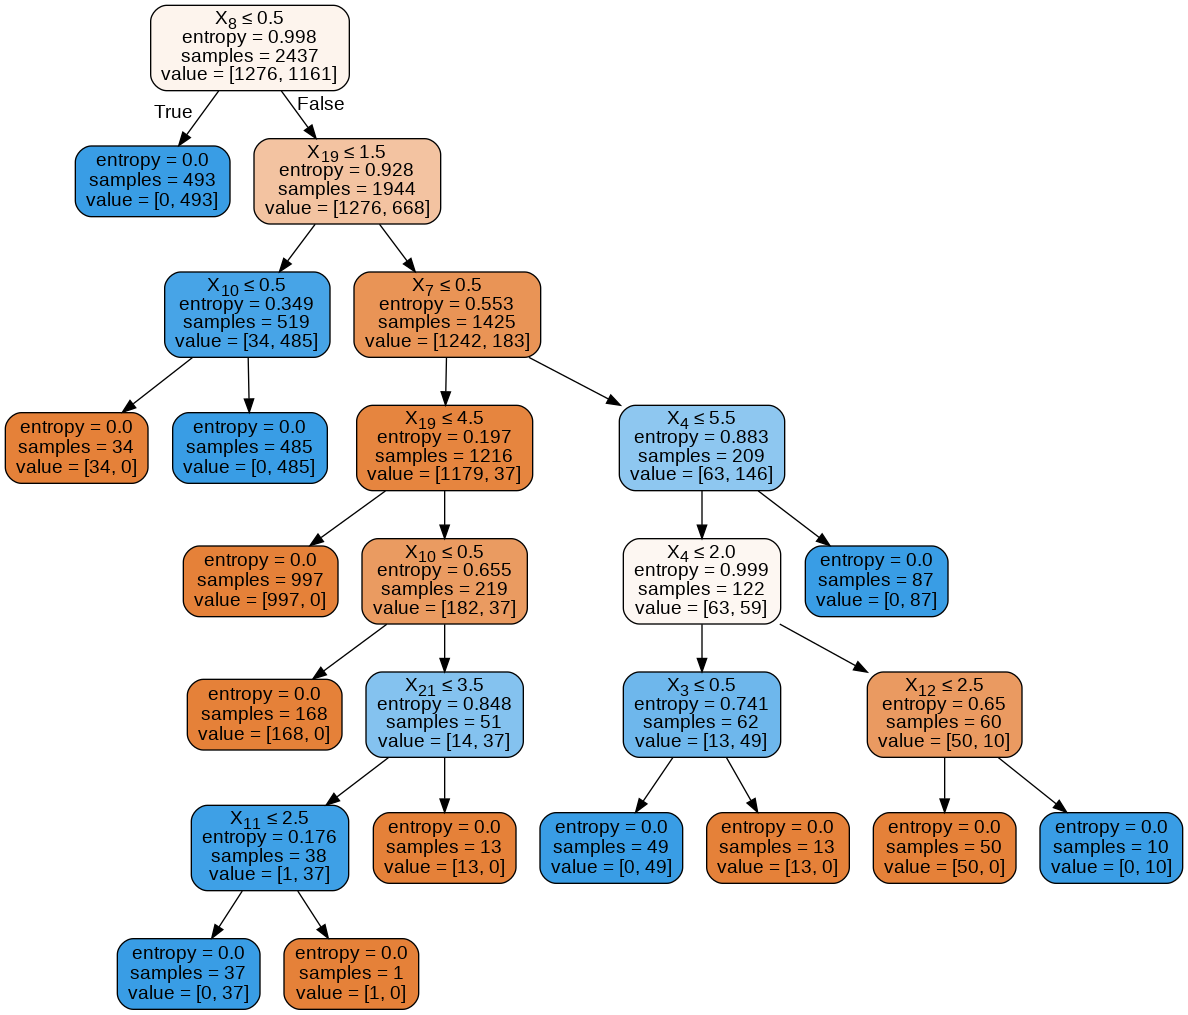

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(first_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



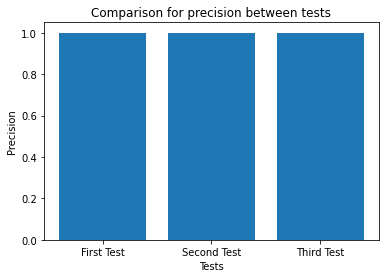

In [ ]:
Tests = ['First Test', 'Second Test', 'Third Test']
Precisions = [precisions['First Decision Tree'],precisions['Second Decision Tree'],precisions['Third Decision Tree']]

plt.bar(Tests, Precisions)
plt.title('Comparison for precision between tests')
plt.xlabel('Tests')
plt.ylabel('Precision')
plt.show()

In [ ]:
df.select_dtypes(include=['object']).dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object